In [26]:
import torch
from torch import nn
from utils import train_ch3, predict_ch3
from d2l import torch as d2l

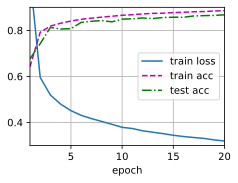

In [27]:
# 定义网络层级结构
net = nn.Sequential(
    nn.Flatten(),          # 输入 [batch, 1, 28, 28] → 展平为 [batch, 784]
    nn.Linear(784, 256),   # 全连接层: 784 → 256
    nn.ReLU(),             # ReLU 激活函数
    nn.Linear(256, 10)     # 全连接层: 256 → 10 (10个类别)
)

# 初始化模型权重,只对 Linear 层的 weight 做初始化，服从 N(0, 0.01)；bias 没特别设置，保持 PyTorch 默认值（通常是 0）。
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# 对所有子模块应用 init_weights，确保每个 Linear 层权重都被重新初始化。
net.apply(init_weights)

# 定义交叉熵损失函数，不做聚合，返回每个样本的 loss
loss = nn.CrossEntropyLoss(reduction='none')
batch_size, lr, num_epochs = 256, 0.1, 20
# 定义梯度下降优化器,用学习率 0.1 的 SGD 来更新模型参数。
trainer = torch.optim.SGD(net.parameters(), lr=lr)
# 加载 Fashion-MNIST 数据集，并返回训练集和测试集迭代器
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
# 训练模型
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

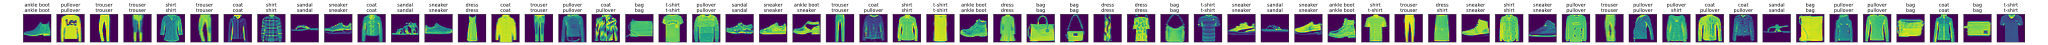

In [30]:
predict_ch3(net, test_iter, n=60)